# Let's understand MET dataset

In [1]:
import numpy as np
import copy
import os
import sys
import math
from tqdm import tqdm
from scripts import dataset
from scripts import config

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Let's load dataset
dataset_name = 'met'

if dataset_name not in ['met', 'lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

if dataset_name == 'mpii':
    TEST_CV_FILEPATH = os.path.join(config.MPII_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
elif dataset_name == 'lsp': # LSP dataset
    TEST_CV_FILEPATH = os.path.join(config.LSP_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.LSP_DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met': # MET dataset
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity1.csv') # test only one image
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_with_head.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo_ub.csv') # cleaned up
    TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity-met_n10.csv') # joint rechecked! (2018.06.18)    
    # for debugging
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46.csv')  # with valid joints info
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46nv.csv')  # without valid joints info

    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
else:
    pass
 
    
print(TEST_CV_FILEPATH)
print(IMG_PATH_PREFIX)

test_dataset = dataset.PoseDataset(
    TEST_CV_FILEPATH,
    IMG_PATH_PREFIX, 227,
    fliplr=False, rotate=False,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)

print("data ready")

14it [00:00, 102.80it/s]

/var/data/MET2/activity-met_n10.csv
/var/data/MET2
Reading dataset from /var/data/MET2/activity-met_n10.csv
Downscale images to the height 400px


33it [00:00, 70.73it/s] 

/var/data/MET2/image/office activities/walking about/33.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/4.png contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/40.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]


53it [00:00, 71.84it/s]

/var/data/MET2/image/office activities/walking about/46.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 0 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/54.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/walking about/58.png contains non-valid joints
[1 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/1.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/10.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/11.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 0 0 1 1]
/var/data/MET2/image/office activities/writing/12.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/14.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/14.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 

117it [00:00, 138.61it/s]

/var/data/MET2/image/office activities/writing/50.jpeg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/51.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/52.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/53.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/54.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/55.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 0 1 1 1 1]
/var/data/MET2/image/office activities/writing/56.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/57.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/58.jpeg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 0 1 1 1]
/v

158it [00:01, 106.43it/s]

/var/data/MET2/image/office activities/reading.seated/28.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/3.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/35.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/36.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/37.jpg contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/38.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/39.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/4.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/41.jpg conta

199it [00:01, 117.85it/s]

/var/data/MET2/image/office activities/reading.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/60.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/8.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/9.bmp contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/1.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/10.bmp contains non-valid joints
[0 0 0 0 0 0 1 0 0 1 0 1 1 1]
/var/data/MET2/image/office activities/typing/11.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/12.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/typing/13.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 1 1

280it [00:01, 148.09it/s]

/var/data/MET2/image/office activities/filing.seated/17.bmp contains non-valid joints
[0 0 0 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/19.bmp contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
/var/data/MET2/image/office activities/filing.seated/2.bmp contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/20.bmp contains non-valid joints
[0 0 0 0 0 0 1 1 0 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/21.jpg contains non-valid joints
[0 1 1 1 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/22.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/24.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/25.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/26.jpg contains non-

339it [00:02, 155.99it/s]

/var/data/MET2/image/office activities/filing.seated/58.jpg contains non-valid joints
[0 0 0 0 1 1 1 1 1 1 1 1 0 1]
/var/data/MET2/image/office activities/filing.seated/59.jpg contains non-valid joints
[0 0 0 0 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/6.bmp contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/60.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/1.bmp contains non-valid joints
[0 0 1 1 0 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/10.bmp contains non-valid joints
[1 1 1 1 1 1 0 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/12.bmp contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.stand/13.bmp contains non-valid joints
[1 1 1 1 1 1 0 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/14.bmp contains non-valid 

402it [00:02, 167.61it/s]

/var/data/MET2/image/resting/reclining/20.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/reclining/7.png contains non-valid joints
[1 1 1 0 0 1 1 1 1 0 1 1 1 1]


441it [00:02, 176.46it/s]/home/yyoo/src/deeppose/scripts/dataset.py:153: UserWarning: Skipping joint with incorrect joints coordinates. They are out of the image.
image: /var/data/MET2/image/resting/seated.quiet/31.jpg, joint: [382.5        403.33333333], im.shape: (400, 267)
  'image: {}, joint: {}, im.shape: {}'.format(img_path, joints[i_joint], image_shape[:2]))
472it [00:02, 180.10it/s]

/var/data/MET2/image/resting/seated.quiet/24.jpg contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/seated.quiet/26.jpg contains non-valid joints
[1 1 0 0 1 1 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/seated.quiet/31.jpg contains non-valid joints
[1 1 0 0 1 1 0 0 1 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/10.png contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
/var/data/MET2/image/resting/sleeping/16.png contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]
/var/data/MET2/image/resting/sleeping/19.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/24.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 1 1 1 0 1 1]


600it [00:02, 214.22it/s]

/var/data/MET2/image/resting/sleeping/30.jpg contains non-valid joints
[1 1 1 1 1 1 1 1 0 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/8.png contains non-valid joints
[0 1 1 1 1 0 1 1 1 1 1 1 1 1]
Joints shape: (14, 2)
data ready


number of images = 599
[383 419 430 429 417 389 592 581 591 594 568 576 594 597]


Text(0,0.5,'ratio of valid joints')

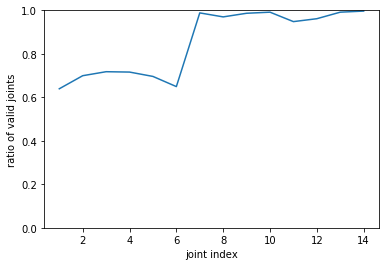

In [3]:
numImages = len(test_dataset.info)
print("number of images = {}".format(numImages))

validJoints = list()
for i, info in enumerate(test_dataset.info):
    #print(info[0])
    #validJoints.append(info[0])
    validJoints.append(info[0][:,0])   # only need X part of valid joints flag
validJoints = np.array(validJoints)  
#print(validJoints)

print(np.sum(validJoints,axis=0))

jointIndex = np.linspace(1,14,14)
plt.plot(jointIndex,np.sum(validJoints,axis=0)/numImages)
plt.ylim(0,1)
plt.xlabel('joint index')
plt.ylabel('ratio of valid joints')




## There are images without HEAD TOP!!!

89
image/office activities/writing/35.jpeg
261
image/office activities/filing.seated/29.jpg


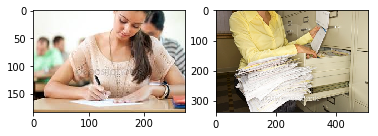

In [4]:
# images without joint 14 (head top)
idxMissing = list()
for i, info in enumerate(test_dataset.info):
    if validJoints[i,13] == 0:
        print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/2),2,i+1)

    img=test_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])

 

In [5]:

# # let's plot some of them  manually  
# plt.subplot(121)
# img=test_dataset.get_original_image(89)
# plt.imshow(img[:,:,::-1])

# plt.subplot(122)
# img=test_dataset.get_original_image(379)
# plt.imshow(img[:,:,::-1])


## Let's check joints in upper body

In [5]:
# how many images are missing any joint in upper body?    # increased from 61 to 70 (2018. 6. 18)
sum(np.sum(validJoints[:,6:],axis=1) != 8)

70

image/office activities/walking about/46.jpg
image/office activities/writing/11.bmp
image/office activities/writing/17.bmp
image/office activities/writing/19.bmp
image/office activities/writing/24.jpeg
image/office activities/writing/25.jpeg
image/office activities/writing/27.jpeg
image/office activities/writing/30.jpeg
image/office activities/writing/35.jpeg
image/office activities/writing/38.jpeg
image/office activities/writing/55.jpeg
image/office activities/writing/58.jpeg
image/office activities/reading.seated/17.jpg
image/office activities/reading.seated/23.png
image/office activities/reading.seated/25.png
image/office activities/typing/10.bmp
image/office activities/typing/33.bmp
image/office activities/filing.seated/1.bmp
image/office activities/filing.seated/10.bmp
image/office activities/filing.seated/12.bmp
image/office activities/filing.seated/13.bmp
image/office activities/filing.seated/19.bmp
image/office activities/filing.seated/2.bmp
image/office activities/filing.seate

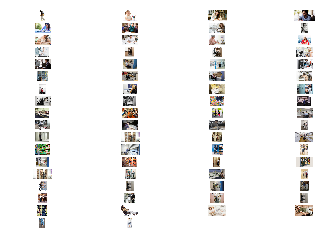

In [32]:
idxMissing = list()
missingImageIDlist = list()

for i, info in enumerate(test_dataset.info):
    if not np.all(validJoints[i,6:]):
        #print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        missingImageIDlist.append(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/4),4,i+1)

    img=test_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

## generate list with whole upper body joints!

In [7]:
idxAllUB = list()
for i, info in enumerate(test_dataset.info):
    if np.all(validJoints[i,6:]):
        #print(i)
        idxAllUB.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

image/office activities/walking about/1.png
image/office activities/walking about/10.png
image/office activities/walking about/11.jpg
image/office activities/walking about/12.jpg
image/office activities/walking about/13.jpg
image/office activities/walking about/14.png
image/office activities/walking about/15.png
image/office activities/walking about/16.png
image/office activities/walking about/17.jpg
image/office activities/walking about/18.png
image/office activities/walking about/19.png
image/office activities/walking about/2.png
image/office activities/walking about/20.jpg
image/office activities/walking about/21.png
image/office activities/walking about/22.png
image/office activities/walking about/23.png
image/office activities/walking about/24.png
image/office activities/walking about/25.png
image/office activities/walking about/26.png
image/office activities/walking about/27.jpg
image/office activities/walking about/28.png
image/office activities/walking about/29.png
image/office

image/office activities/filing.seated/25.jpg
image/office activities/filing.seated/26.jpg
image/office activities/filing.seated/28.jpg
image/office activities/filing.seated/30.jpg
image/office activities/filing.seated/33.jpg
image/office activities/filing.seated/34.jpg
image/office activities/filing.seated/36.jpg
image/office activities/filing.seated/36.jpg
image/office activities/filing.seated/37.jpg
image/office activities/filing.seated/38.jpg
image/office activities/filing.seated/39.jpg
image/office activities/filing.seated/40.jpg
image/office activities/filing.seated/41.jpg
image/office activities/filing.seated/43.jpg
image/office activities/filing.seated/44.jpg
image/office activities/filing.seated/46.jpg
image/office activities/filing.seated/48.jpg
image/office activities/filing.seated/50.jpg
image/office activities/filing.seated/52.jpg
image/office activities/filing.seated/53.jpg
image/office activities/filing.seated/54.jpg
image/office activities/filing.seated/56.jpg
image/offi

image/resting/standing.relaxed/29.JPG
image/resting/standing.relaxed/3.bmp
image/resting/standing.relaxed/30.JPG
image/resting/standing.relaxed/31.JPG
image/resting/standing.relaxed/32.JPG
image/resting/standing.relaxed/33.JPG
image/resting/standing.relaxed/34.JPG
image/resting/standing.relaxed/35.JPG
image/resting/standing.relaxed/36.JPG
image/resting/standing.relaxed/37.JPG
image/resting/standing.relaxed/38.JPG
image/resting/standing.relaxed/39.JPG
image/resting/standing.relaxed/4.bmp
image/resting/standing.relaxed/40.JPG
image/resting/standing.relaxed/41.JPG
image/resting/standing.relaxed/42.JPG
image/resting/standing.relaxed/43.JPG
image/resting/standing.relaxed/44.JPG
image/resting/standing.relaxed/45.JPG
image/resting/standing.relaxed/46.JPG
image/resting/standing.relaxed/47.JPG
image/resting/standing.relaxed/48.JPG
image/resting/standing.relaxed/49.JPG
image/resting/standing.relaxed/5.bmp
image/resting/standing.relaxed/50.JPG
image/resting/standing.relaxed/51.JPG
image/resting/s

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 72,
 73,
 74,
 75,
 76,
 79,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 1

In [27]:
import pandas as pd
MET2_joints=pd.read_csv(TEST_CV_FILEPATH,header=None) # ,index_col=0)
MET2_joints.head()
print(len(MET2_joints))



# select
MET2_joints_UB = MET2_joints.iloc[idxAllUB]
MET2_joints_UB.head()
MET2_joints_UB.reset_index(drop=True, inplace=True)    # MUST RE-INDEX AFTER DROPNA!!!
print(len(MET2_joints_UB))

MET2_joints_UB.to_csv('activity-met_n10_ub.csv',index=False, header=None)

600
529


In [34]:
# make sure missing image is not included
misc['image_id']
MET2_joints_UB_re=pd.read_csv('activity-met_n10_ub.csv',header=None) # ,index_col=0)

MET2_joints_UB_re.head()

for missingImageID in missingImageIDlist:
    if np.sum(MET2_joints_UB[0] == missingImageIDlist[0]):
        print('problem!!!')
        print(missingImageID)
